# PROJECT NAME: Cars dataset analysis.


**INTRODUCTION:**

The cars dataset encompasses a comprehensive array of information regarding different car models, encompassing details such as model names, prices, mileage, engine sizes, fuel types, and other attributes. This analysis was conducted utilizing Python programming language and various data visualization libraries to derive insights from the dataset.

**PROJECT OBJECTIVE:**

The primary aim of this project was to analyze the cars dataset to discern prevailing market trends and consumer preferences. By delving into the dataset, valuable insights were extracted to aid decision-making processes. Additionally, the project aimed to uncover various trends and demands within the automotive industry landscape.

**DATASET OVERVIEW:**

The cars dataset offers a wealth of information, including unique car identifiers, model names, model IDs, fuel IDs, fuel types, mileage, miles per gallon (mpg), engine sizes, transmission IDs, and transmission types. This diverse range of attributes provides a comprehensive view of each car model, facilitating thorough analysis and interpretation.





**METHODOLOGY**

**Data Manipulation:** The dataset underwent comprehensive data manipulation techniques to organize and structure the information for analysis. This involved tasks such as merging datasets, filtering out irrelevant data, and transforming data types to ensure consistency and accuracy.

**Data Cleaning:** A rigorous data cleaning process was implemented to address missing values, duplicates, and inconsistencies within the dataset. This involved techniques such as imputation, removal of duplicates, and standardization of data formats to enhance data quality and reliability.

**Data Visualization:** Data visualization played a pivotal role in this analysis, utilizing libraries such as Matplotlib, Seaborn to create insightful visual representations of the dataset. Various types of plots, including bar charts, scatter plots, and histograms, were employed to visualize trends, patterns, and relationships within the data.

**Statistical Analysis:** Statistical analysis techniques were applied to extract meaningful insights from the dataset.

**Interpretation and Reporting:** The findings from the analysis were interpreted to extract actionable insights and recommendations. A comprehensive report was generated, summarizing key findings, trends, and recommendations for stakeholders in the automotive industry.



**Importing the libraries**

In [ ]:
# importing pandas library for data manipluation and data analysis
import pandas as pd

# importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\CW\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Importing the files**

In [ ]:
audi = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\audi.csv")
bmw = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\bmw.csv")
hyndai = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\hyndai.csv")
merc = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\merc.csv")
cclass = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\cclass.csv")
fueltype = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\fueltype.csv")
models = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\models.csv")
transmission = pd.read_csv(r"C:\Users\CW\OneDrive\Desktop\MASAI\PROJECTS\PYTHON PROJECTS\transmission.csv")

**Merging the files and creating a one combine file**

In [ ]:
# Merging each dataset on common id types

# Merging the fueltype dataset with each cartypes
audi = pd.merge(audi, fueltype, on = "fuel_ID")
bmw = pd.merge(bmw, fueltype, on = "fuel_ID")
hyndai = pd.merge(hyndai, fueltype, on = "fuel_ID")
merc = pd.merge(merc, fueltype, on = "fuel_ID")
cclass = pd.merge(cclass, fueltype, on = "fuel_ID")

In [ ]:
# Merging the models
audi = pd.merge(audi, models, on = "model_ID")
bmw = pd.merge(bmw, models, on = "model_ID")
hyndai = pd.merge(hyndai, models, on = "model_ID")
merc = pd.merge(merc, models, on = "model_ID")
cclass = pd.merge(cclass, models, on = "model_ID")


In [ ]:
# Merging the transmission type

audi = pd.merge(audi, transmission, left_on = "transmission_ID", right_on = "ID", how = "inner")
bmw = pd.merge(bmw, transmission, left_on = "transmission_ID", right_on = "ID", how = "inner")
hyndai = pd.merge(hyndai, transmission, left_on = "transmission_ID", right_on = "ID", how = "inner")
merc = pd.merge(merc, transmission, left_on = "transmission_ID", right_on = "ID", how = "inner")
cclass = pd.merge(cclass, transmission, left_on = "transmission_ID", right_on = "ID", how = "inner")

**Combining all the files**

In [ ]:
cars = pd.concat([audi, bmw, hyndai, merc, cclass])
cars.head(2)

,ID_x,model_ID,year,price,mileage,tax,mpg,engineSize,transmission_ID,fuel_ID,fueltype,model_name,ID_y,transmission
0,1,14,2017,12500,15735,150.0,55.400002,1.4,2,5,Petrol,A1,2,Manual
1,2,19,2016,16500,36203,20.0,64.199997,2.0,1,1,Diesel,A6,1,Automatic


In [ ]:
# Datatypes of all the columns
cars.dtypes

ID_x                 int64
model_ID             int64
year                 int64
price                int64
mileage              int64
tax                float64
mpg                float64
engineSize         float64
transmission_ID      int64
fuel_ID              int64
fueltype            object
model_name          object
ID_y                 int64
transmission        object
dtype: object

# Cleaning

In [ ]:
# checking for duplicates
print(cars.duplicated())

#if there is any duplicates values then drop it
cars.drop_duplicates(inplace = True)


0       False
1       False
2       False
3       False
4       False
        ...  
3894    False
3895    False
3896    False
3897    False
3898    False
Length: 43327, dtype: bool


In [ ]:
# renaming the columns

cars.rename(columns = {"ID_x":"ID"}, inplace = True)

# removing the extra transmission_ID column

cars.drop("ID_y",axis = 1, inplace = True)

In [ ]:
#lets check for null values

cars.isnull().sum().any()

True

In [ ]:
# checking for missing values:
missing_values = cars.isnull().sum()
print(missing_values)

# in two columns their are missing values more than 3000 and that values will affect the calculation
#and data analysis in future.

ID                    0
model_ID              0
year                  0
price                 0
mileage               0
tax                3899
mpg                3899
engineSize            0
transmission_ID       0
fuel_ID               0
fueltype              0
model_name            0
transmission          0
dtype: int64


In [ ]:
#checking the null values as column wise

cars[cars.isnull().sum(axis = 1)>0]

,ID,model_ID,year,price,mileage,tax,mpg,engineSize,transmission_ID,fuel_ID,fueltype,model_name,transmission
0,10669,25,2020,30495,1200,NaN,NaN,2.0,1,1,Diesel,C Class,Automatic
1,10670,25,2020,29989,1000,NaN,NaN,1.5,1,5,Petrol,C Class,Automatic
2,10671,25,2020,37899,500,NaN,NaN,2.0,1,1,Diesel,C Class,Automatic
3,10672,25,2019,30399,5000,NaN,NaN,2.0,1,1,Diesel,C Class,Automatic
4,10673,25,2019,29899,4500,NaN,NaN,2.0,1,1,Diesel,C Class,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,14563,25,2017,14700,31357,NaN,NaN,1.6,2,1,Diesel,C Class,Manual
3895,14564,25,2018,18500,28248,NaN,NaN,2.1,1,1,Diesel,C Class,Automatic
3896,14565,25,2014,11900,48055,NaN,NaN,2.1,2,1,Diesel,C Class,Manual
3897,14566,25,2014,11300,49865,NaN,NaN,2.1,1,1,Diesel,C Class,Automatic


In [ ]:
#So filling into null values for better calculation

cars.fillna(0, inplace = True)
cars.isnull().sum().any()

False

# Overview of cars dataset

In [ ]:
# describe
cars.describe()

,ID,model_ID,year,price,mileage,tax,mpg,engineSize,transmission_ID,fuel_ID
count,43327.000000,43327.000000,43327.00000,43327.000000,43327.000000,43327.000000,43327.000000,43327.000000,43327.000000,43327.000000
mean,21664.000000,31.996307,2017.17668,22333.493941,23528.963164,116.741293,49.272860,1.988903,2.509959,2.576269
std,12507.571893,24.352224,2.21214,11497.927746,22651.001667,71.256779,24.868261,0.588785,1.299561,1.929932
min,1.000000,1.000000,1970.00000,650.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,10832.500000,14.000000,2016.00000,14950.000000,6000.000000,30.000000,40.900002,1.600000,1.000000,1.000000
50%,21664.000000,25.000000,2017.00000,20000.000000,16943.000000,145.000000,51.400002,2.000000,2.000000,1.000000
75%,32495.500000,43.000000,2019.00000,27440.000000,34153.000000,145.000000,61.400002,2.100000,4.000000,5.000000
max,43327.000000,93.000000,2020.00000,159999.000000,323000.000000,580.000000,470.799988,6.600000,4.000000,5.000000


In [ ]:
cars.max()

ID                      43327
model_ID                   93
year                     2020
price                  159999
mileage                323000
tax                     580.0
mpg                470.799988
engineSize                6.6
transmission_ID             4
fuel_ID                     5
fueltype               Petrol
model_name                 i8
transmission        Semi-Auto
dtype: object

In [ ]:
cars.min()

ID                         1
model_ID                   1
year                    1970
price                    650
mileage                    1
tax                      0.0
mpg                      0.0
engineSize               0.0
transmission_ID            1
fuel_ID                    1
fueltype              Diesel
model_name          1 Series
transmission       Automatic
dtype: object

# Ranking

**Ranking the car models based on metrics such as total sales, average price, mileage, and engine size**

In [ ]:
# grouping car models for each metrices

cars_metric = cars.groupby("model_name").agg(total_sales = ("price", "sum"),
                                             average_price = ("price", "mean"),
                                              mileage = ("mileage", "mean"),
                                               engine_size = ("engineSize", "mean"))

# ranking all the columns in cars_metrics:

cars_metric["sales_rank"] = cars_metric["total_sales"].rank(ascending = False)
cars_metric["price_rank"] = cars_metric["average_price"].rank(ascending = True)
cars_metric["mileage_rank"] = cars_metric["mileage"].rank(ascending = True)
cars_metric["engineSize_rank"] = cars_metric["engine_size"].rank(ascending = False)

# overall rank for all metrics

cars_metric["Overall_rank"] = cars_metric[["sales_rank", "price_rank", "mileage_rank", "engineSize_rank"]].sum(axis = 1)

final_rank = cars_metric.sort_values(by="Overall_rank")
final_rank.head(5)

,total_sales,average_price,mileage,engine_size,sales_rank,price_rank,mileage_rank,engineSize_rank,Overall_rank
model_name,,,,,,,,,
2 Series,24013888,19539.371847,17042.604557,1.873474,11.0,32.0,21.0,68.0,132.0
4 Series,22385926,22498.418090,21786.536683,2.243216,13.0,44.0,38.0,42.0,137.0
GLC Class,31612228,32929.404167,16540.288542,2.218437,7.0,68.0,20.0,46.0,141.0
Tucson,20564328,15818.713846,21095.780769,1.673462,15.0,22.0,33.0,72.0,142.0
SL CLASS,8116535,31217.442308,15243.350000,2.657308,30.0,62.0,18.0,32.0,142.0


# Data analysis and visualization

**Fuel Analysis :**

**Insight.1 : Distribution of cars by each fuel types.**

fueltype
Diesel      25739
Petrol      16536
Hybrid        999
Other          50
Electric        3
Name: count, dtype: int64


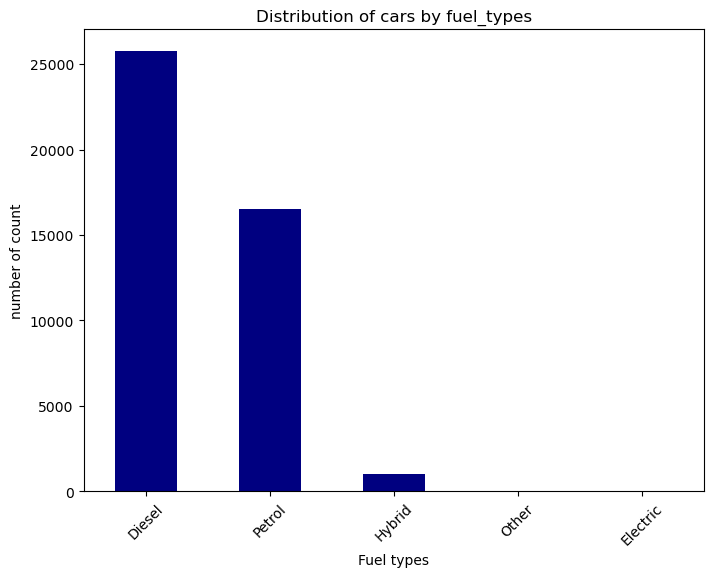

In [ ]:
cars_by_fueltypes = cars["fueltype"].value_counts()
print(cars_by_fueltypes)

# Bar graph to show the distribution
plt.figure(figsize = (8,6))
cars_by_fueltypes.plot(kind = "bar", title = "Distribution of cars by fuel_types", color = "navy")

plt.xlabel("Fuel types")
plt.ylabel("number of count")
plt.xticks(rotation = 45)
plt.show()

**ANALYSIS:**
The data shows that most cars in the dataset run on Diesel or Petrol, which are regular types of fuel. This means people mostly stick to what they know. However, there are a few cars that use Hybrid technology, which is a mix of traditional fuel and electricity. It seems like people are starting to show interest in more eco-friendly options, but it's not very common yet. Cars using Other or Electric fuels are quite rare, probably because they're newer and not as widely available or popular.


**Insight.2: Average price of cars by their fuel type.**

                 price
fueltype              
Diesel    22182.774117
Electric  18466.000000
Hybrid    22489.070070
Other     18823.260000
Petrol    22570.012518


<Figure size 1000x700 with 0 Axes>

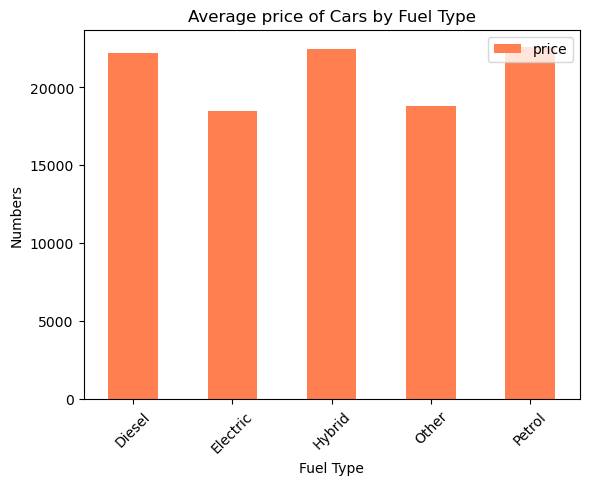

In [ ]:
#average price for each fuel type
averageprice_by_fueltype = cars.groupby("fueltype").agg({"price":"mean"})
print(averageprice_by_fueltype)

# visualization
plt.figure(figsize = (10,7))
averageprice_by_fueltype.plot(kind = "bar", color = "coral")

plt.title('Average price of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Numbers')
plt.xticks(rotation = 45)

plt.show()

**ANALYSIS:** Once again, the chart and report confirm that cars preferred by consumers tend to have higher prices. This is evident from the popularity of Diesel and Petrol cars, which are often more affordable but still meet consumers' needs. However, there's a noticeable trend towards Hybrid and Electric cars, indicating a shift towards eco-friendly options. Despite their higher prices, consumers seem willing to invest in these alternatives for their environmental benefits.

**Insight.2.1. Fuel price over time :**

C:\Users\CW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\CW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0.5, 1.0, 'Fueltype cost changes over time')

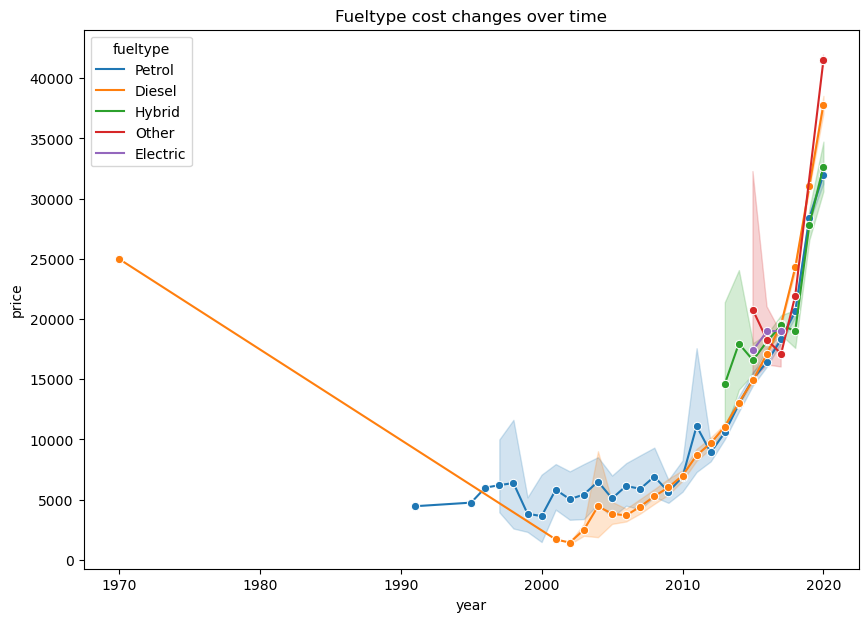

In [ ]:
plt.figure(figsize = (10,7))
sns.lineplot(x = "year", y = "price", hue = "fueltype", data = cars, marker = "o")
plt.title("Fueltype cost changes over time")

**ANALYSIS:** In this price over year report we can see that as per demand the price for diesel and petrol are also increasing over a year. In 2020 the change in price as per fuel types is quite high and in 1970 to 2000 we can see a doownfall in price.

**Insight.3 :** Analysing the average efficiency of cars by fuel type

                 mpg
fueltype            
Diesel     52.082730
Electric  470.799988
Hybrid     97.294294
Other     162.875998
Petrol     41.578048


<Figure size 800x600 with 0 Axes>

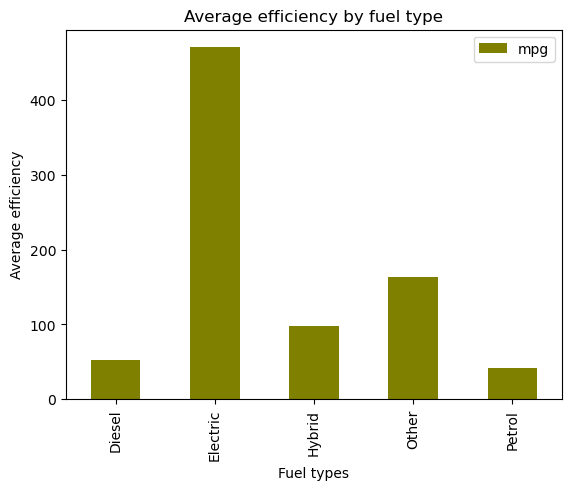

In [ ]:
Avg_mpg = cars.groupby("fueltype").agg({"mpg":"mean"})
print(Avg_mpg)

#visualization
plt.figure(figsize = (8,6))
Avg_mpg.plot(kind = "bar", color = "olive")

plt.title("Average efficiency by fuel type")
plt.xlabel("Fuel types")
plt.ylabel("Average efficiency")

plt.show()

**Analysis:**
This data shows how efficient cars are based on their fuel types. Electric cars lead the pack by a significant margin, followed by Hybrids, while Diesel and Petrol cars trail behind in efficiency. This highlights the appeal of Electric and Hybrid options for those looking to save on fuel costs and reduce environmental impact.

**Insight.4 : Average mileage of cars by fuel type.**

               mileage
fueltype              
Diesel    27730.889428
Electric  19925.333333
Hybrid    25292.908909
Other     45428.000000
Petrol    16816.354136


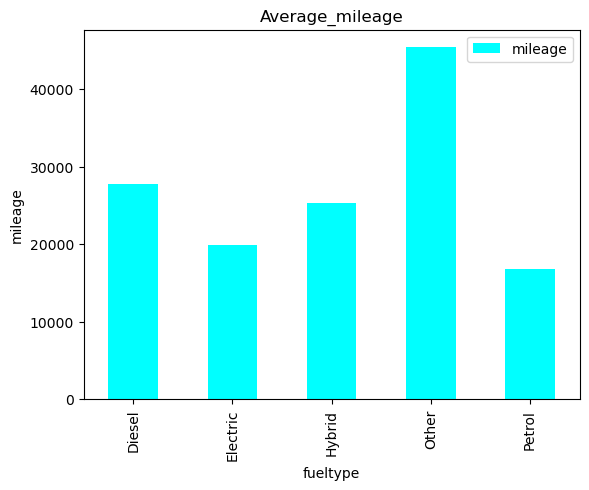

In [ ]:
average_mileage = cars.groupby("fueltype").agg({"mileage":"mean"})
print(average_mileage)

# visualization
average_mileage.plot(kind = "bar", color = "cyan")
# sns.countplot(x = "fueltype", data = cars, order = average_mileage.index, palette = "viridis")

plt.title("Average_mileage")
plt.xlabel("fueltype")
plt.ylabel("mileage")

plt.show()

**Analysis:**
This data reveals the average mileage covered by cars of different fuel types. Interestingly, Other fuel types stand out with the highest mileage, followed by Diesel and Hybrid cars. Petrol cars have comparatively lower mileage. Electric cars, despite being eco-friendly, cover fewer miles on average. This suggests that while Other, Diesel, and Hybrid cars offer good mileage, Electric cars may require more frequent charging or have limited driving ranges.

# Transmission Analysis:

**Insights.5 : Distribution of cars by each transmission type.**

transmission
Semi-Auto    17754
Automatic    13418
Manual       12150
Other            5
Name: count, dtype: int64


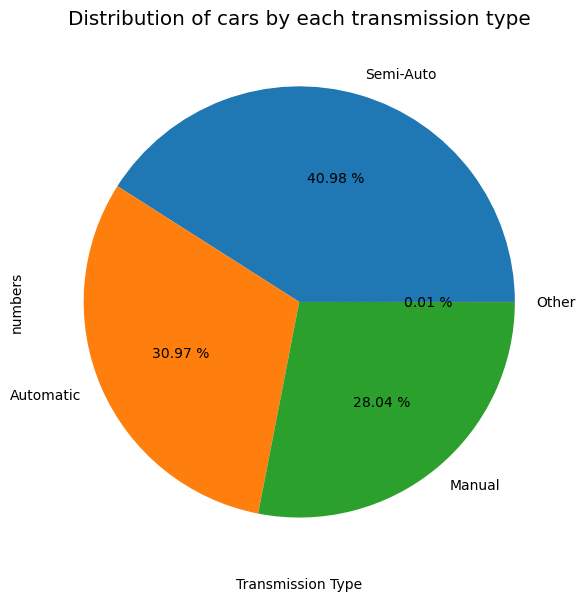

In [ ]:
cars_by_transmission = cars["transmission"].value_counts()
print(cars_by_transmission)

# pie chart to show the distribution
plt.figure(figsize = (10,7))
cars_by_transmission.plot(kind = "pie", autopct = "%.2f %%")
plt.style.use("ggplot")

plt.title("Distribution of cars by each transmission type")
plt.xlabel("Transmission Type")
plt.ylabel("numbers")
plt.xticks(rotation = 45)


plt.show()

**Analysis:**
This data outlines the distribution of cars based on their transmission types. The majority of cars have Semi-Automatic transmission, followed by Automatic and Manual transmissions. The presence of "Other" transmission types is negligible compared to the main three. This suggests a preference for Semi-Automatic transmissions among consumers, possibly due to their convenience and ease of use, while Manual transmissions remain a popular choice for those who prefer more control over their driving experience.

**Insight.6 : Average price of cars by transmission type.**

                     price
transmission              
Automatic     24025.315397
Manual        14191.566996
Other         14636.000000
Semi-Auto     26628.978878


<Figure size 1000x700 with 0 Axes>

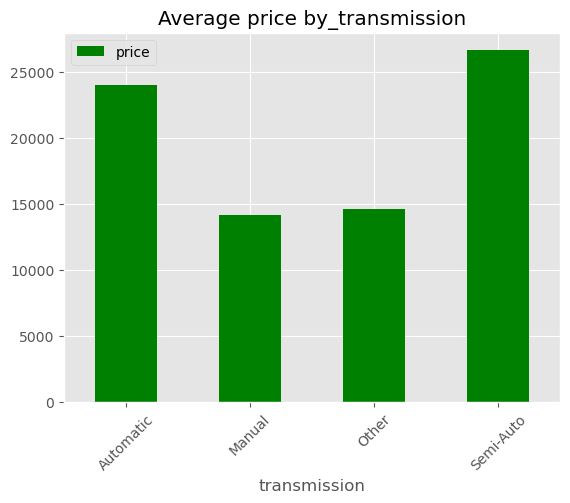

In [ ]:
averageprice_by_transmission = cars.groupby("transmission").agg({"price":"mean"})
print(averageprice_by_transmission)

#visaulization
plt.figure(figsize = (10,7))
averageprice_by_transmission.plot(kind = "bar", title = "Average price by_transmission", color = "green")

plt.xticks(rotation = 45 )
plt.show()

**Analysis:**
Based on the distribution analysis shown in the chart, it's evident that cars favored by consumers tend to have higher prices. This correlation between demand and price is expected; when there's high demand for a particular type of car, manufacturers often set higher prices. This is a result of the basic economic principle of supply and demand. So, the more popular a car is among consumers, the higher its price tends to be.

# Price Analysis:

**Insight.7 : Top 5 expensive cars.**

In [ ]:
Expensive_cars = cars.nlargest(5,"price")
Expensive_cars

,ID,model_ID,year,price,mileage,tax,mpg,engineSize,transmission_ID,fuel_ID,fueltype,model_name,transmission
6199,20767,32,2020,159999,1350,145.0,21.4,4.0,4,5,Petrol,G Class,Semi-Auto
10044,24612,32,2020,154998,3000,150.0,21.4,4.0,1,5,Petrol,G Class,Automatic
5,14573,75,2011,149948,3000,570.0,21.4,6.2,1,5,Petrol,SL CLASS,Automatic
4783,4784,63,2020,145000,2000,145.0,21.1,5.2,4,5,Petrol,R8,Semi-Auto
8737,23305,13,2019,140319,785,150.0,22.1,4.0,4,5,Petrol,A Class,Semi-Auto


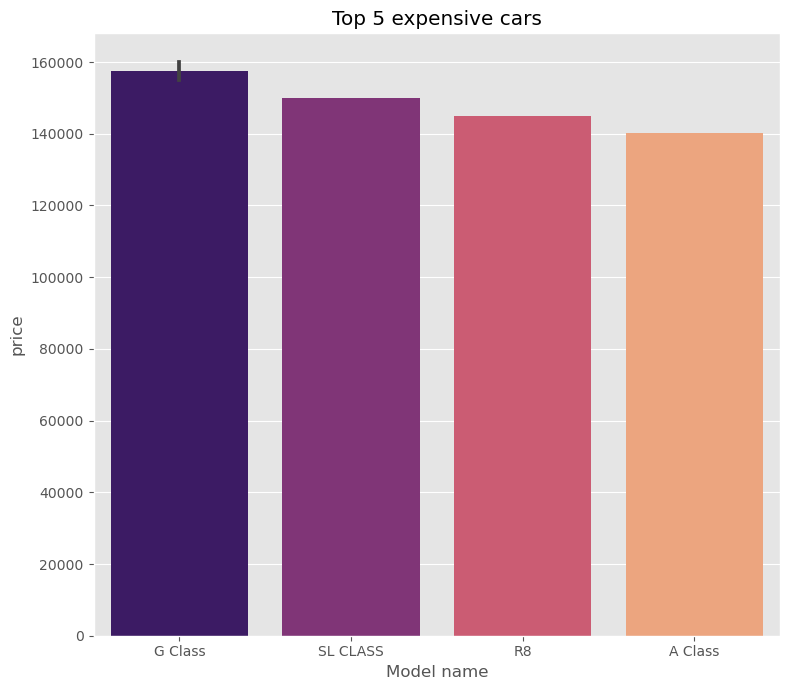

In [ ]:
#bar plot to show the Top 5 Expensive cars
plt.figure(figsize = (8, 7))
sns.barplot(x = "model_name", y = "price", data = Expensive_cars, palette = "magma" )

plt.title("Top 5 expensive cars")
plt.xlabel("Model name")
plt.ylabel("price")
plt.tight_layout()

plt.show()


**Annalysis:**
Based on the data, it's evident that the G class car model stands out as more expensive. This is likely due to its alignment with consumer preferences, such as having a semi-automatic transmission, popular Petrol fuel type, good mileage, efficiency, and adequate engine size. These features cater to consumer demands, resulting in higher prices due to increased demand. Following the G class, other expensive models include the SL class, R8, and A class. These observations highlight how consumer preferences and market demand directly influence the pricing of car models.

**Insight.8 Revenue of car company by year.**


Overall_Revenue - 967643292
          price
year           
2019  414179340
2017  150637575
2016  120241268
2018  101206852
2020   84943399


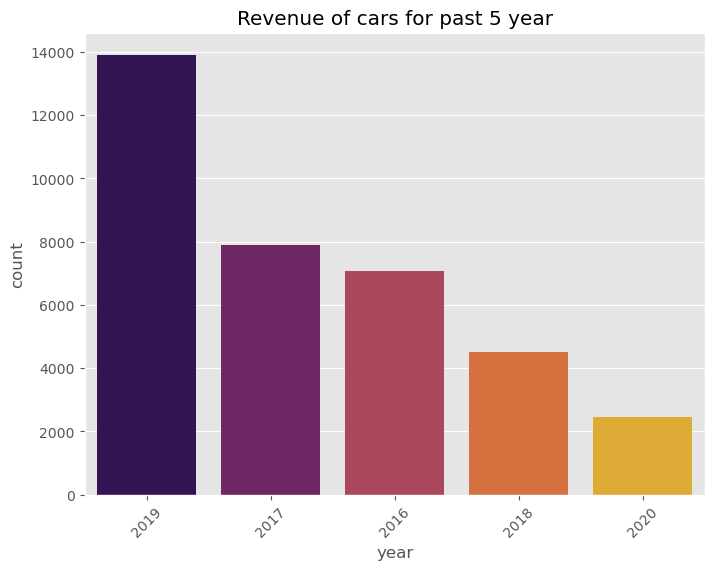

In [ ]:
# Total revenue
print("Overall_Revenue -",cars["price"].sum())

# for past 5 year
Total_Revenue = cars.groupby("year").agg({"price":"sum"})

Revenue_of_5years = Total_Revenue.nlargest(5,"price")
print(Revenue_of_5years)

#visualization
plt.figure(figsize = (8,6))
sns.countplot(x = "year", data = cars, order = Revenue_of_5years.index, palette = "inferno")
plt.title("Revenue of cars for past 5 year")

plt.xticks(rotation = 45)
plt.show()

**Analysis:**  On the above data, it's clear that the revenue for the car company increased in 2019 compared to the previous years. However, there was a decrease in revenue in 2020. This decline in revenue in 2020 could be attributed to various factors, such as the COVID-19 pandemic, which had a significant impact on the automotive industry worldwide. The pandemic led to disruptions in supply chains, production, and reduced consumer spending, all of which could have contributed to the decrease in revenue for the car company in 2020. Additionally, economic uncertainty and shifts in consumer behavior during the pandemic may have further dampened sales and revenue for the company during that year.

**Insight.9:** Analysisng the **price trends over year**

C:\Users\CW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price trends over year')

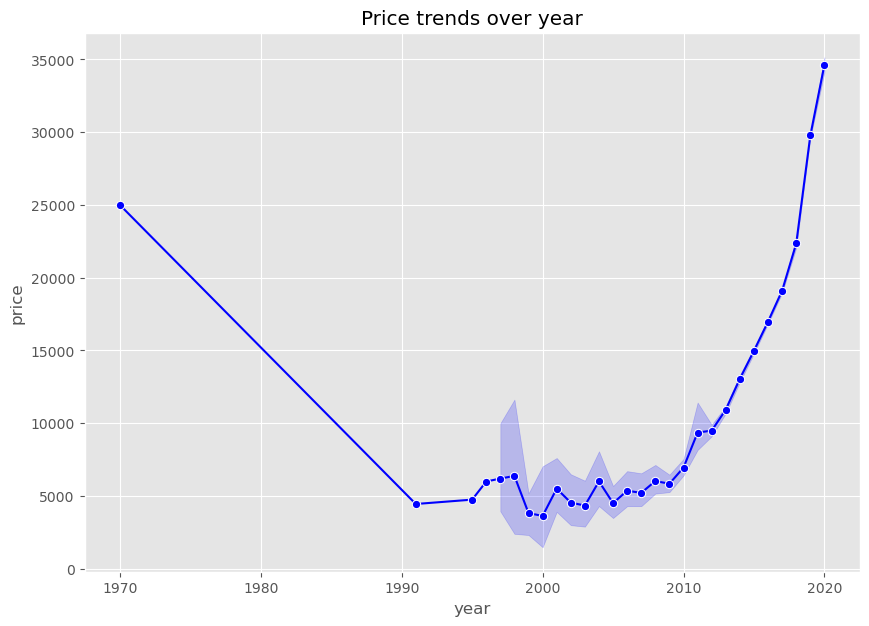

In [ ]:
plt.figure(figsize = (10,7))

sns.lineplot(x = "year", y = "price", data = cars, color = "blue", marker = "o", markeredgecolor = "white")
plt.title("Price trends over year")

**Analysis:**
Based on the price trend chart over the years, it's evident that car prices were relatively lower in the 1990s and early 2000s. Prices remained relatively stable until 2020 when the price get increased in a high rate. This increase in prices in 2020 could be attributed to growing consumer demand. However, it's essential to note that several other factors, such as inflation, technological advancements, and changes in manufacturing costs, could also influence price fluctuations. Therefore, while consumer demand likely played a role in the price increase in 2020, it's essential to consider various other factors that may have contributed to this trend.

**Insights.10 :** Checking the most demanding or **Top selling cars model.**

model_name
C Class      181094291
A Class       50834818
E Class       49765215
3 Series      48568936
A3            33581039
Q3            32589954
GLC Class     31612228
1 Series      31152869
A4            27972777
Q5            26700869
2 Series      24013888
5 Series      23799524
4 Series      22385926
A5            20795015
Tucson        20564328
A1            19299480
X5            18556760
GLE Class     18524761
Q2            18508954
Q7            17780963
Name: total_sales, dtype: int64


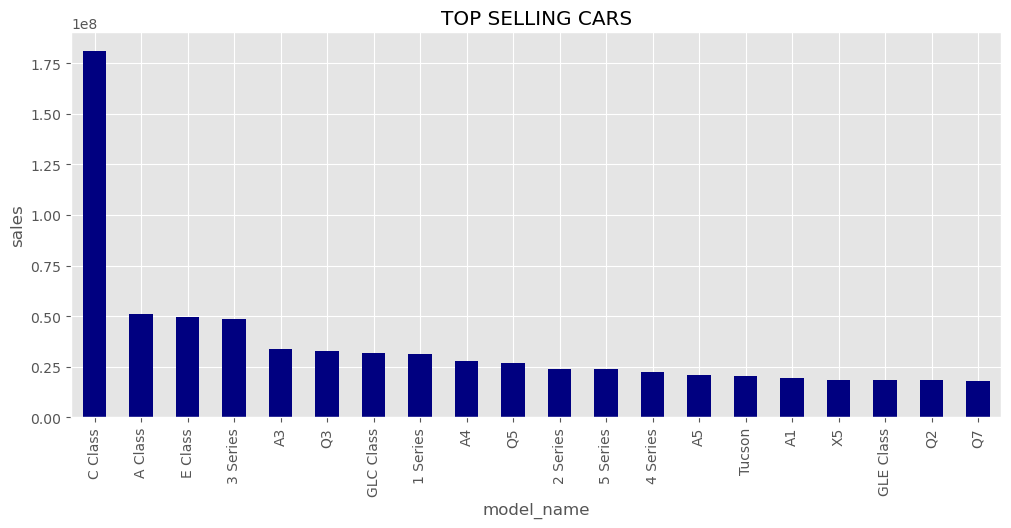

In [ ]:
top_selling = final_rank.nlargest(20, "total_sales")
top_selling_cars = top_selling["total_sales"]
print(top_selling_cars)

#visualization

plt.figure(figsize = (12,5))
top_selling_cars.plot(kind = "bar", color = "navy")

plt.title("TOP SELLING CARS")
plt.xlabel("model_name")
plt.ylabel("sales")
plt.xticks(rotation = 90)

plt.show()

**Analysis:**
Based on the data for top-selling cars highlights strong market demand for diverse models, including luxury car like C Class and S Class, as well as GLC Class and GLE Class. Performance-oriented models like A class and 3 series also feature prominently, indicating consumer interest in high-performance vehicles. This diversity in top sellers reflects evolving consumer preferences across different segments of the automotive market.

**Insight.11:** Mileage vs price

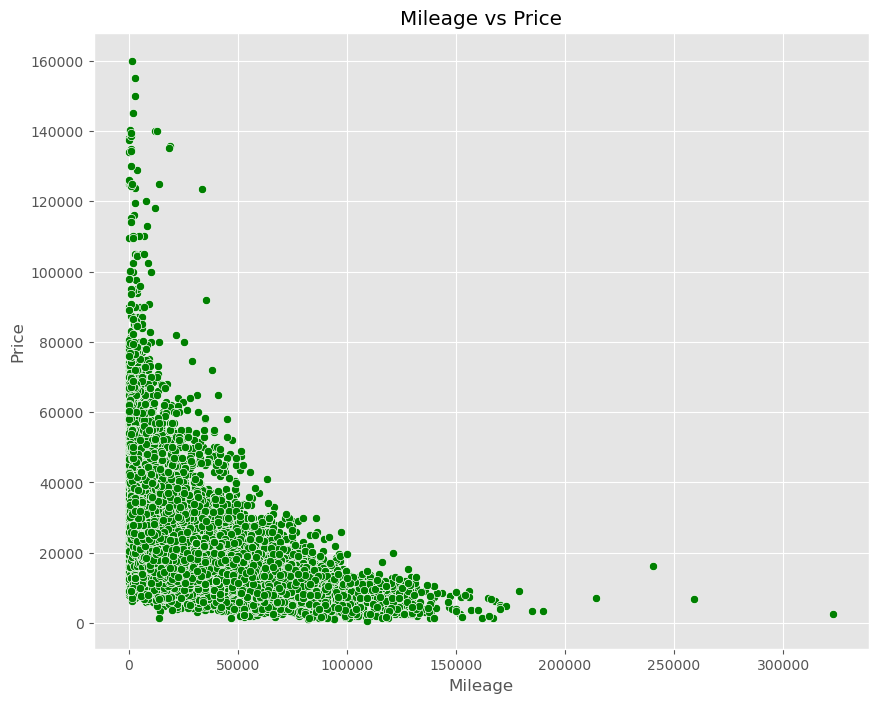

In [ ]:
#scatter plot to check the relation between price and mileage

plt.figure(figsize = (10,8))
sns.scatterplot(x = "mileage", y = "price", data = cars, color = "green")

plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.grid(True)

plt.show()

**Analysis**
Based on the scatter chart of mileage versus price reveals a noticiable relationship between the two variables. As both price and mileage increase, there appears to be a widening gap between them. This suggests that while higher-priced cars tend to offer better mileage.